In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset

In [ ]:

df = pd.read_csv("students.csv")

# Select relevant attributes for clustering

In [ ]:

attributes = ['age', 'NumberOffriends', 'basketball', 'football', 'soccer']

# Remove rows with missing values

In [ ]:

df = df.dropna(subset=attributes)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12504 entries, 1 to 14999
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gradyear         12504 non-null  int64 
 1   gender           12042 non-null  object
 2   age              12504 non-null  object
 3   NumberOffriends  12504 non-null  int64 
 4   basketball       12504 non-null  int64 
 5   football         12504 non-null  int64 
 6   soccer           12504 non-null  int64 
 7   softball         12504 non-null  int64 
 8   volleyball       12504 non-null  int64 
 9   swimming         12504 non-null  int64 
 10  cheerleading     12504 non-null  int64 
 11  baseball         12504 non-null  int64 
 12  tennis           12504 non-null  int64 
 13  sports           12504 non-null  int64 
 14  cute             12504 non-null  int64 
 15  Gender           12504 non-null  int64 
 16  Type             12504 non-null  int64 
 17  hot              12504 non-null  int

# Convert non-numeric data to NaN

In [19]:
df[attributes] = df[attributes].apply(pd.to_numeric, errors='coerce')

# Remove rows with missing values

In [20]:
df = df.dropna(subset=attributes)


# Standardize the data

In [21]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[attributes])

# Perform PCA for visualization

In [17]:

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# DBSCAN clustering

In [22]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(df_scaled)

# Hierarchical clustering

In [23]:

hierarchical = AgglomerativeClustering(n_clusters=None, distance_threshold=0.5)
hierarchical_clusters = hierarchical.fit_predict(df_scaled)

# Plot the clusters

In [24]:
plt.figure(figsize=(14, 5))

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

# DBSCAN Clustering

Text(0, 0.5, 'PCA Component 2')

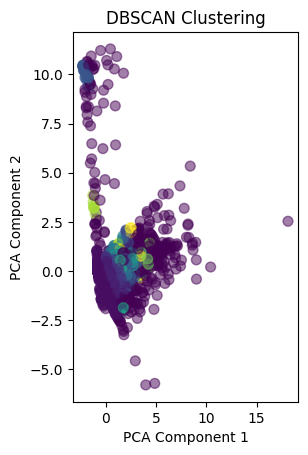

In [25]:
plt.subplot(1, 2, 1)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=dbscan_clusters, cmap='viridis', s=50, alpha=0.5)
plt.title("DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Hierarchical Clustering

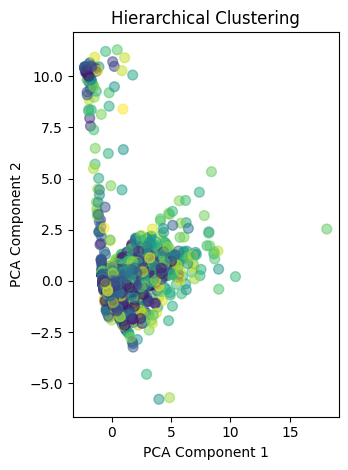

In [26]:
plt.subplot(1, 2, 2)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=hierarchical_clusters, cmap='viridis', s=50, alpha=0.5)
plt.title("Hierarchical Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.tight_layout()
plt.show()


# Count the number of points in each cluster

In [27]:
dbscan_cluster_counts = np.bincount(dbscan_clusters[dbscan_clusters != -1])
hierarchical_cluster_counts = np.bincount(hierarchical_clusters)

print("DBSCAN Cluster Counts:", dbscan_cluster_counts)
print("Hierarchical Cluster Counts:", hierarchical_cluster_counts)

DBSCAN Cluster Counts: [ 372 7962   11  830  712  210  143   82  236  222   81   15   30   54
   74   24   83   80   65    5   49   79    9    5   24   11   20   27
   22    7    9   40    7   16   22    5   12   16    9    6    6    5
    5    8    7    6   10    5    3    5    5    6]
Hierarchical Cluster Counts: [ 60 113   3  12   3  38  24   8  10   6  85   3  68  30   2   2   4  17
   2   9  37  24   5   5  26  26   2   7  13  55   4   4  10  23   7  20
  35   5  20   2   9   8   5   2   5   5   2  11  27  27  32  13   2  11
  11   4  37  25  19   3   4   6   3   4   2  18  13   3   3  19   3  11
  92  22   6  11  15   5  15  37   4  82  58   9  10  41  15  16   2   4
  12  20  17   9   2  17   3  34   4   3   3   7   2   2   4   4   2   2
   2  54   7  17  85   9 203  70   3   4  35   4  67 102   6   2  33 158
  66  10   3  15  70   2   7   2  12   3   2   3   2   2   3   4   3 104
  14   2  31  10  25  79  12  53  15  11 231   6  60  15   8  20   9  60
  10   3   3   9  12  22  

# Calculate Silhouette Score

In [28]:
silhouette_dbscan = silhouette_score(df_scaled, dbscan_clusters)
silhouette_hierarchical = silhouette_score(df_scaled, hierarchical_clusters)

print("DBSCAN Silhouette Score:", silhouette_dbscan)
print("Hierarchical Silhouette Score:", silhouette_hierarchical)


DBSCAN Silhouette Score: 0.3320378049656614
Hierarchical Silhouette Score: 0.3448158017599553
